# A_3 Analyse and clean row data 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../data/raw/WA_Fn-UseC_-Telco-Customer-Churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
data.shape

(7043, 21)

In [4]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

####  there is no null data

In [5]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

### Churn

In [6]:
data['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

#### It is imbalanced. It needs upsampling or SMOTE

In [7]:
import re

df = data.copy()

# Function to insert underscore before capital letters (except the first character) and convert to lowercase
def rename_columns_with_underscores(df):
    def insert_underscore(column_name):
        return re.sub(r'(?<!^)(?=[A-Z])', '_', column_name)

    new_columns = {col: insert_underscore(col).lower() for col in df.columns}
    df.rename(columns=new_columns, inplace=True)

# Call the function to rename columns with underscores and convert to lowercase
rename_columns_with_underscores(df)
df

,customer_i_d,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,...,device_protection,tech_support,streaming_t_v,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


### Gender

In [8]:
df['gender'].value_counts()

gender
Male      3555
Female    3488
Name: count, dtype: int64

##### Check if there is a relationship between Gender and Churn. Chi2 test

In [9]:
import scipy.stats as st
from scipy.stats import ttest_1samp
data_crosstab = pd.crosstab(df['gender'], df['churn'], margins = False)
data_crosstab

churn,No,Yes
gender,,
Female,2549,939
Male,2625,930


In [10]:
st.chi2_contingency(np.array(data_crosstab))

Chi2ContingencyResult(statistic=0.4840828822091383, pvalue=0.48657873605618596, dof=1, expected_freq=array([[2562.38989067,  925.61010933],
       [2611.61010933,  943.38989067]]))

##### p_value is 0.4 and 0.4 > 0.05. Therefore, there is no relationship between them. And it is removed.

In [11]:
df.drop('gender', axis=1, inplace=True)

### senior_citizen

In [12]:
df['senior_citizen'].value_counts()

senior_citizen
0    5901
1    1142
Name: count, dtype: int64

##### Check if there is a relationship between senior_citizen and Churn. Chi2 test

In [13]:
data_crosstab2 = pd.crosstab(df['senior_citizen'], df['churn'], margins = False)
data_crosstab2

churn,No,Yes
senior_citizen,,
0,4508,1393
1,666,476


In [14]:
st.chi2_contingency(np.array(data_crosstab2))

Chi2ContingencyResult(statistic=159.42630036838742, pvalue=1.510066805092378e-36, dof=1, expected_freq=array([[4335.05239245, 1565.94760755],
       [ 838.94760755,  303.05239245]]))

##### p_value is 1.510066805092378e-36 and 1.510066805092378e-36 < 0.05. Therefore, there is relationship between them.

In [15]:
df['senior_citizen'] = df['senior_citizen'].map({0: 'No', 1: 'Yes'})

df['senior_citizen'].head()

0    No
1    No
2    No
3    No
4    No
Name: senior_citizen, dtype: object

### partner

In [16]:
df['partner'].value_counts()

partner
No     3641
Yes    3402
Name: count, dtype: int64

##### Check if there is a relationship with Churn. Chi2 test

In [17]:
data_crosstab3 = pd.crosstab(df['partner'], df['churn'], margins = False)
data_crosstab3

churn,No,Yes
partner,,
No,2441,1200
Yes,2733,669


In [18]:
st.chi2_contingency(np.array(data_crosstab3))

Chi2ContingencyResult(statistic=158.7333820309922, pvalue=2.1399113440759935e-36, dof=1, expected_freq=array([[2674.78830044,  966.21169956],
       [2499.21169956,  902.78830044]]))

##### p_value is 2.1399113440759935e-36 and 2.1399113440759935e-36 < 0.05. Therefore, there is relationship between them.

### dependents

In [19]:
df['dependents'].value_counts()

dependents
No     4933
Yes    2110
Name: count, dtype: int64

##### Check if there is a relationship with Churn. Chi2 test

In [20]:
data_crosstab4 = pd.crosstab(df['dependents'], df['churn'], margins = False)
data_crosstab4

churn,No,Yes
dependents,,
No,3390,1543
Yes,1784,326


In [21]:
st.chi2_contingency(np.array(data_crosstab4))

Chi2ContingencyResult(statistic=189.12924940423474, pvalue=4.9249216612154196e-43, dof=1, expected_freq=array([[3623.93042737, 1309.06957263],
       [1550.06957263,  559.93042737]]))

##### p_value is 4.9249216612154196e-43, and 4.9249216612154196e-43, < 0.05. Therefore, there is relationship between them.

### tenure

In [22]:
df['tenure'].value_counts()

tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: count, Length: 73, dtype: int64

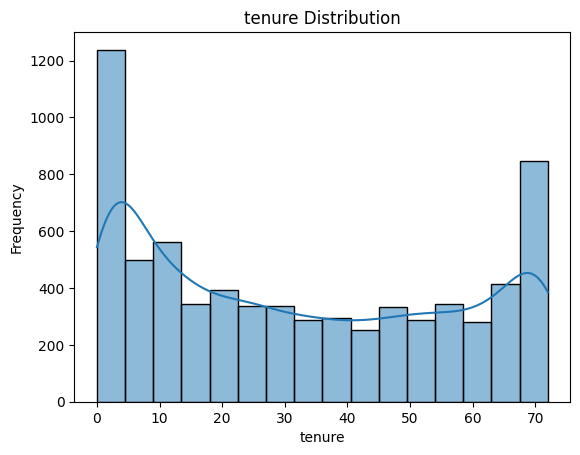

In [23]:
# Create a histogram using Seaborn
sns.histplot(df['tenure'], kde=True)

# Set plot labels and title
plt.xlabel('tenure')
plt.ylabel('Frequency')
plt.title('tenure Distribution')

# Display the plot
plt.show()

### phone_service

In [24]:
df['phone_service'].value_counts()

phone_service
Yes    6361
No      682
Name: count, dtype: int64

##### Check if there is a relationship with Churn. Chi2 test

In [25]:
data_crosstab5 = pd.crosstab(df['phone_service'], df['churn'], margins = False)
st.chi2_contingency(np.array(data_crosstab5))

Chi2ContingencyResult(statistic=0.9150329892546948, pvalue=0.3387825358066928, dof=1, expected_freq=array([[ 501.01774812,  180.98225188],
       [4672.98225188, 1688.01774812]]))

##### p_value is 0.3387825358066928, and 40.3387825358066928 > 0.05. Therefore, there is no relationship between them.

In [26]:
df.drop('phone_service', axis=1, inplace=True)

### multiple_lines

In [27]:
df['multiple_lines'].value_counts()

multiple_lines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64

##### Check if there is a relationship with Churn. Chi2 test

In [28]:
data_crosstab6 = pd.crosstab(df['multiple_lines'], df['churn'], margins = False)
st.chi2_contingency(np.array(data_crosstab6))

Chi2ContingencyResult(statistic=11.33044148319756, pvalue=0.0034643829548773, dof=2, expected_freq=array([[2490.39613801,  899.60386199],
       [ 501.01774812,  180.98225188],
       [2182.58611387,  788.41388613]]))

##### p_value is 0.0034643829548773, and 0.0034643829548773 < 0.05. Therefore, there is relationship between them.

### internet_service

In [29]:
df['internet_service'].value_counts()

internet_service
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

##### Check if there is a relationship with Churn. Chi2 test

In [30]:
data_crosstab7 = pd.crosstab(df['internet_service'], df['churn'], margins = False)
st.chi2_contingency(np.array(data_crosstab7))

Chi2ContingencyResult(statistic=732.309589667794, pvalue=9.571788222840544e-160, dof=2, expected_freq=array([[1778.53954281,  642.46045719],
       [2274.41488002,  821.58511998],
       [1121.04557717,  404.95442283]]))

##### p_value is 9.571788222840544e-160, and 9.571788222840544e-160 < 0.05. Therefore, there is relationship between them.

### online_security

In [31]:
df['online_security'].value_counts()

online_security
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64

##### Check if there is a relationship with Churn. Chi2 test

In [32]:
data_crosstab8 = pd.crosstab(df['online_security'], df['churn'], margins = False)
st.chi2_contingency(np.array(data_crosstab8))

Chi2ContingencyResult(statistic=849.9989679615965, pvalue=2.661149635176552e-185, dof=2, expected_freq=array([[2569.73619196,  928.26380804],
       [1121.04557717,  404.95442283],
       [1483.21823087,  535.78176913]]))

Therefore, there is relationship between them.

### online_backup

In [33]:
df['online_backup'].value_counts()

online_backup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64

In [34]:
# Chi2 test to evaluate if being online backup is related to Churn
data_crosstab9 = pd.crosstab(df['online_backup'], df['churn'], margins = False)
st.chi2_contingency(np.array(data_crosstab9))

Chi2ContingencyResult(statistic=601.812790113409, pvalue=2.0797592160864276e-131, dof=2, expected_freq=array([[2268.53783899,  819.46216101],
       [1121.04557717,  404.95442283],
       [1784.41658384,  644.58341616]]))

##### Therefore, there is relationship between them.

### device_protection

In [ ]:
df['device_protection'].value_counts()

In [ ]:
# Chi2 test to evaluate if device_protection is related to Churn
data_crosstab10 = pd.crosstab(df['device_protection'], df['churn'], margins = False)
st.chi2_contingency(np.array(data_crosstab10))

##### There is relationship between them

### tech_support

In [ ]:
df['tech_support'].value_counts()

In [ ]:
# Chi2 test to evaluate if tech_suport is related to Churn
data_crosstab11 = pd.crosstab(df['tech_support'], df['churn'], margins = False)
st.chi2_contingency(np.array(data_crosstab11))

##### There is relationship between them

### streaming_tv

In [37]:
data_crosstab20 = pd.crosstab(df['streaming_t_v'], df['streaming_movies'], margins = False)
st.chi2_contingency(np.array(data_crosstab20))

Chi2ContingencyResult(statistic=8374.206314231764, pvalue=0.0, dof=4, expected_freq=array([[1111.15291779,  608.83998296, 1090.00709925],
       [ 603.42325713,  330.63694448,  591.93979838],
       [1070.42382507,  586.52307255, 1050.05310237]]))

In [ ]:
df['streaming_t_v'].value_counts()

In [ ]:
# Chi2 test to evaluate if straming_tv is related to Churn
data_crosstab12 = pd.crosstab(df['streaming_t_v'], df['churn'], margins = False)
st.chi2_contingency(np.array(data_crosstab12))

There is relationship between them

In [ ]:
# rename 
df = df.rename(columns={'streaming_t_v':'streaming_tv'})

### streaming_movies

In [ ]:
df['streaming_movies'].value_counts()

In [ ]:
# Chi2 test to evaluate if streming movies is related to Churn
data_crosstab13 = pd.crosstab(df['streaming_movies'], df['churn'], margins = False)
st.chi2_contingency(np.array(data_crosstab13))

There is relationship between them

### contract

In [ ]:
df['contract'].value_counts()

In [ ]:
# Chi2 test to evaluate if contract is related to Churn
data_crosstab14 = pd.crosstab(df['contract'], df['churn'], margins = False)
st.chi2_contingency(np.array(data_crosstab14))

There is relationship between them

### paperless_billing

In [ ]:
df['paperless_billing'].value_counts()

In [ ]:
# Chi2 test to evaluate if paeperless_billing is related to Churn
data_crosstab15 = pd.crosstab(df['paperless_billing'], df['churn'], margins = False)
st.chi2_contingency(np.array(data_crosstab15))

There is relationship between them

### payment_method

In [ ]:
df['payment_method'].value_counts()

In [ ]:
# Chi2 test to evaluate if payment_method is related to Churn
data_crosstab16 = pd.crosstab(df['payment_method'], df['churn'], margins = False)
st.chi2_contingency(np.array(data_crosstab16))

There is relationship between them

### monthly_charges

In [ ]:
# Create a histogram using Seaborn
sns.histplot(df['monthly_charges'], kde=True)

# Set plot labels and title
plt.xlabel('monthly_charges')
plt.ylabel('Frequency')
plt.title('monthly_charges Distribution')

# Display the plot
plt.show()

#####  it needs scaling later.

### total_charges

In [ ]:
df['total_charges'] = df['total_charges'].str.strip()

df['total_charges'] = pd.to_numeric(df['total_charges'], errors='coerce')

# Drop rows with NaN values in 'total_charges' column
df.dropna(subset=['total_charges'], inplace=True)

df['total_charges'].isnull().sum()

In [ ]:
df['total_charges'].dtypes

In [ ]:
# Create a histogram using Seaborn
sns.histplot(df['total_charges'], kde=True)

# Set plot labels and title
plt.xlabel('total_charges')
plt.ylabel('Frequency')
plt.title('total_charges Distribution')

# Display the plot
plt.show()

### It neads transformation later

## Checking for multicollinearity

In [ ]:
numericals = df.select_dtypes(np.number)
corr_matrix=numericals.corr(method='pearson')  # default
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

#### There is high multicollinearity between two variables between 'tenure' and 'total_charges': 0.83. This time, tenure is removoed.  

In [ ]:
df.drop('customer_i_d', axis=1, inplace=True)
#df.drop('tenure', axis=1, inplace=True)

In [ ]:
df.to_csv('../data/cleaned_data/2re_semi_cleaned_data.csv', index=False)